In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
prefix = './data/stanfordSentimentTreebank/'

# Load all dataframes
sentences_df = pd.read_csv(prefix + 'datasetSentences.txt', sep='\t')
dictionary_df = pd.read_csv(prefix + 'dictionary.txt', sep='|', names=['phrase', 'phrase ids'])
sentiment_labels_df = pd.read_csv(prefix + 'sentiment_labels.txt', sep='|')
dataset_split_df = pd.read_csv(prefix + 'datasetSplit.txt', sep=',')

# Merge all dataframes
sentiment_data_df = (sentences_df
                  .merge(dictionary_df, left_on='sentence', right_on='phrase', how='left')
                  .merge(sentiment_labels_df, on='phrase ids', how='left')
                  .merge(dataset_split_df, on='sentence_index', how='left'))

In [3]:
# Drop missing values
sentiment_data_df = sentiment_data_df.dropna()

# Tokenize the text data
sentiment_data_df['tokenized_text'] = sentiment_data_df['sentence'].str.lower().apply(word_tokenize)

sentiment_data_df.head()

,sentence_index,sentence,phrase,phrase ids,sentiment values,splitset_label,tokenized_text
0,1,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century 's...,226166.0,0.69444,1,"[the, rock, is, destined, to, be, the, 21st, c..."
1,2,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of `` Th...,226300.0,0.83333,1,"[the, gorgeously, elaborate, continuation, of,..."
2,3,Effective but too-tepid biopic,Effective but too-tepid biopic,13995.0,0.51389,2,"[effective, but, too-tepid, biopic]"
3,4,If you sometimes like to go to the movies to h...,If you sometimes like to go to the movies to h...,14123.0,0.73611,2,"[if, you, sometimes, like, to, go, to, the, mo..."
4,5,"Emerges as something rare , an issue movie tha...","Emerges as something rare , an issue movie tha...",13999.0,0.86111,2,"[emerges, as, something, rare, ,, an, issue, m..."


In [4]:
# Save dataframe to pickle
sentiment_data_df.to_pickle('./data/sentiment_data.pkl')

In [5]:
# Basic Statistics
num_samples = len(sentiment_data_df)
avg_length = sentiment_data_df['tokenized_text'].apply(len).mean()

print(f"Number of samples: {num_samples}")
print(f"Average length of reviews: {round(avg_length, 2)} words")

Number of samples: 11286
Average length of reviews: 18.89 words


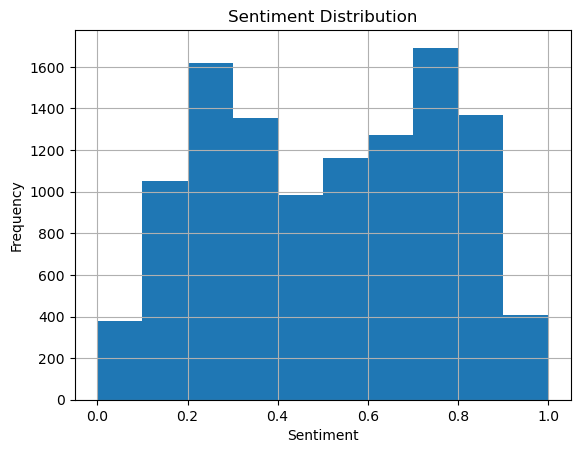

In [6]:
# Sentiment Label Distribution
sentiment_data_df['sentiment values'].hist()
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

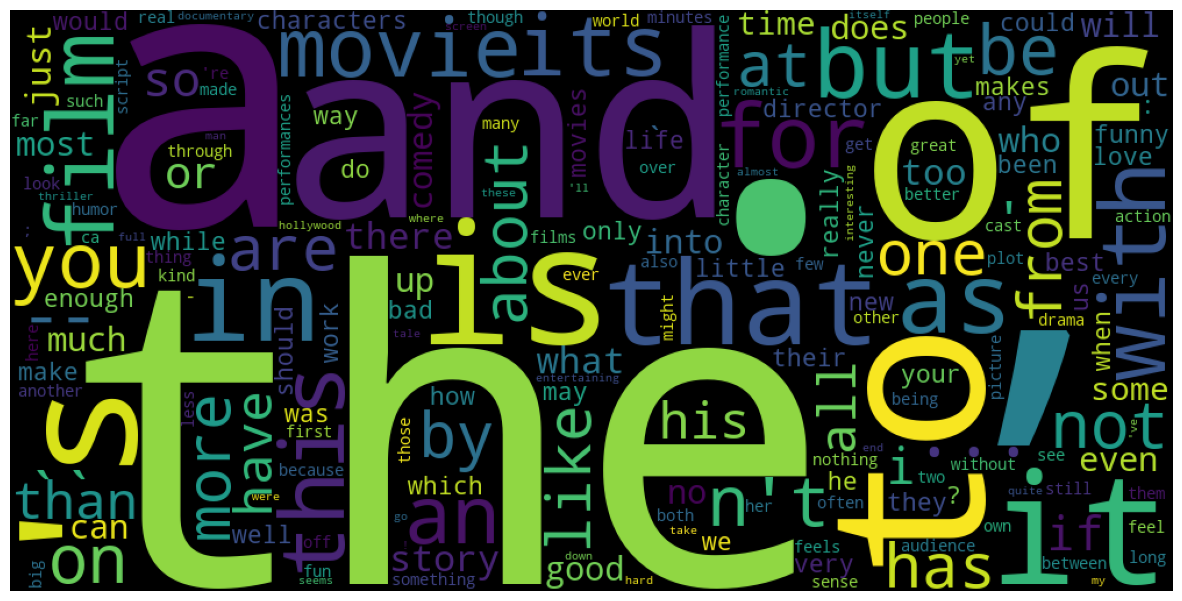

In [7]:
# Word Cloud
word_freq = Counter()
sentiment_data_df['tokenized_text'].apply(lambda x: word_freq.update(x))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_freq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

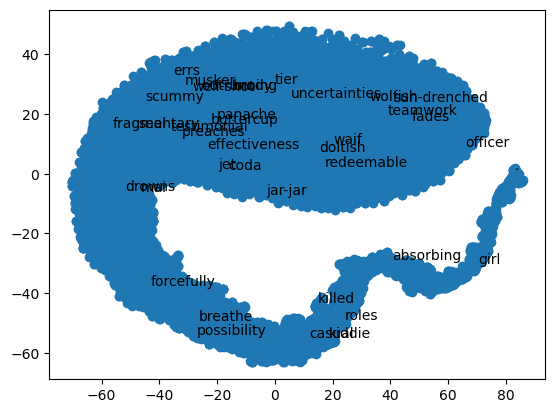

In [12]:
# Train a Word2Vec model
model = Word2Vec(sentiment_data_df['tokenized_text'], min_count=1)
embeddings = model.wv.vectors
word_list = model.wv.index_to_key

# Visualize the embeddings
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

fig, ax = plt.subplots()
for i, (word, (x, y)) in enumerate(zip(word_list, embeddings_2d)):
    if i % 500 == 0:
        ax.annotate(word, (x, y))

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()